In [5]:
#Q.1 Crime data set-Agglomerative/Hierarchical Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
df=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Clustering\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
def norm_fun(i):
    return ((i-i.min())/(i.max()-i.min()))

In [9]:
df1=norm_fun(df.iloc[:,1:])
df1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


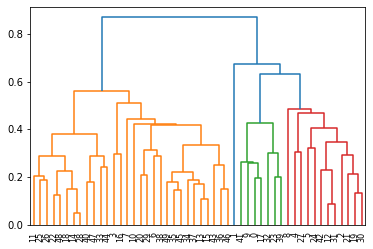

In [10]:
dendrogram=sch.dendrogram(sch.linkage(df1,method='average'))

In [84]:
cl=set(dendrogram['color_list'])
n=len(cl)-1
n

3

In [89]:
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [90]:
y=hc.fit_predict(df1)
y

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
y1=pd.DataFrame(y,columns=['Clusters'])
y2=pd.concat([df,y1],axis=1)
y2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

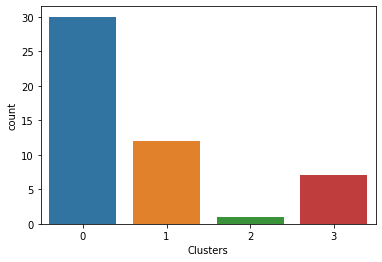

In [92]:
sns.countplot(y2['Clusters'])

In [15]:
y2.iloc[:,1:5].groupby(y2.Clusters).mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [ ]:
#K-Means Clustering

In [16]:
from sklearn.cluster import KMeans

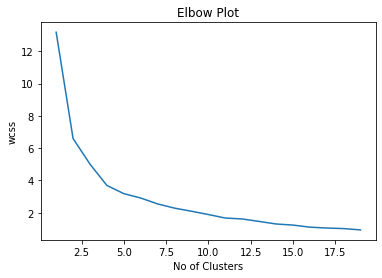

In [26]:
wcss= []
for k in range(1,20):
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
model=KMeans(n_clusters=5)
model.fit(df1)
model.labels_

array([0, 0, 3, 1, 3, 3, 4, 1, 3, 0, 4, 2, 3, 1, 2, 1, 1, 0, 2, 3, 4, 3,
       2, 0, 1, 2, 2, 3, 2, 4, 3, 3, 0, 2, 1, 1, 1, 4, 4, 0, 2, 0, 3, 4,
       2, 1, 1, 2, 2, 1])

In [34]:
Clust=pd.DataFrame(model.labels_,columns=['Clust'])
y3=pd.concat([df,Clust], axis=1)
y3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clust', ylabel='count'>

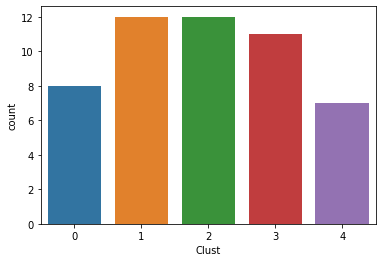

In [35]:
sns.countplot(y3['Clust'])

In [36]:
y3.iloc[:,1:5].groupby(y3.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,14.087500,252.750000,53.500000,24.537500
1,7.058333,152.916667,65.083333,21.000000
2,3.091667,76.000000,52.083333,11.833333
3,11.054545,264.090909,79.090909,32.618182
4,4.757143,123.428571,81.857143,16.071429


In [ ]:
#DBSCAN Clustering

In [40]:
x=df.iloc[:,1:]

In [44]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler().fit(x)
X=std.transform(x)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [45]:
from sklearn.cluster import DBSCAN

In [78]:
model1=DBSCAN(eps=0.8,min_samples=6)
model1.fit(X)
model1.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [79]:
C1=pd.DataFrame(model1.labels_,columns=['DBCluster'])
y4=pd.concat([df,C1],axis=1)
y4

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,DBCluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBCluster', ylabel='count'>

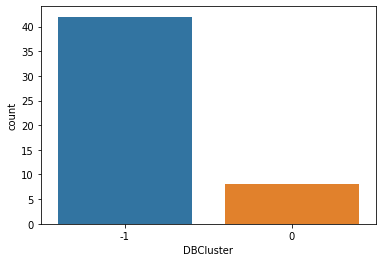

In [80]:
sns.countplot(y4['DBCluster'])

In [81]:
y4.iloc[:,1:5].groupby(y4.DBCluster).mean()

,Murder,Assault,UrbanPop,Rape
DBCluster,,,,
-1,8.009524,178.904762,65.380952,21.7500
0,6.625000,128.000000,66.375000,18.5125


In [ ]:
# Q.2 East-West Airlines data set-Agglomerative/Hierarchical Clustering


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [96]:
fd=pd.read_excel (r"E:\Susmita_Backup\Data Science Course\Data Science Assignment\Clustering\EastWestAirlines.xlsx", sheet_name='data')
fd.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [99]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [98]:
fd.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [100]:
def norm_fun(i):
    return ((i-i.min())/(i.max()-i.min()))

In [101]:
fd1=norm_fun(fd.iloc[:,1:])
fd1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


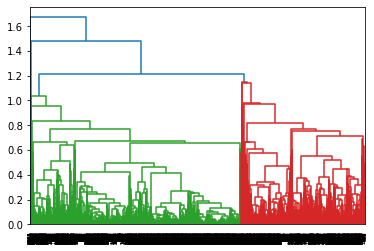

In [140]:
dendrogram=sch.dendrogram(sch.linkage(fd1,method='average'))

In [141]:
cl1=set(dendrogram['color_list'])
n1=len(cl1)-1
n1

3

In [147]:
ac= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [148]:
y5=ac.fit_predict(fd1)
y5

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [149]:
y5.shape

(3999,)

In [150]:
y6=pd.DataFrame(y5,columns=['Clusters'])
y7=pd.concat([fd,y6],axis=1)
y7

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clusters', ylabel='count'>

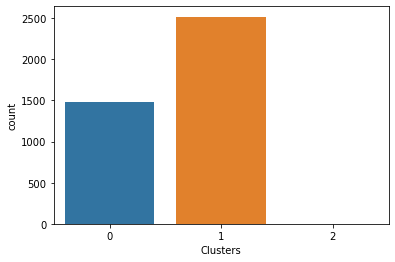

In [151]:
sns.countplot(y7['Clusters'])

In [168]:
y7.iloc[:,1:12].groupby(y7.Clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,
0,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0


In [ ]:
#K-Means Clustering

In [153]:
from sklearn.cluster import KMeans

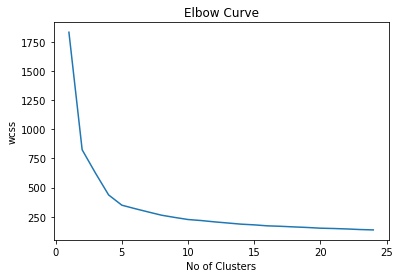

In [157]:
wcss= []
for i in range(1,25):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(fd1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('Elbow Curve')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [158]:
model2=KMeans(n_clusters=5)
model2.fit(fd1)
model2.labels_

array([1, 1, 1, ..., 0, 3, 3])

In [159]:
Clt=pd.DataFrame(model2.labels_,columns=['Clust'])
y8=pd.concat([fd,Clt], axis=1)
y8

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clust', ylabel='count'>

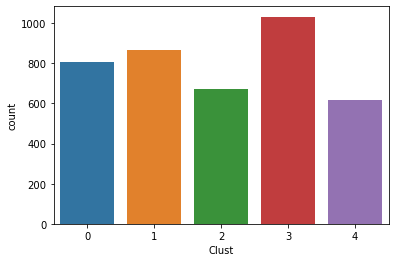

In [160]:
sns.countplot(y8['Clust'])

In [170]:
y8.iloc[:,1:12].groupby(y8.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0


In [ ]:
#DBSCAN Clustering

In [177]:
x1=fd.iloc[:,1:]

In [178]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler().fit(x1)
X1=sts.transform(x1)
X1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [179]:
from sklearn.cluster import DBSCAN

In [186]:
model3=DBSCAN(eps=0.8,min_samples=12)
model3.fit(X1)
model3.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [188]:
C2=pd.DataFrame(model3.labels_,columns=['DBCluster'])
y9=pd.concat([fd,C2],axis=1)
y9

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBCluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DBCluster', ylabel='count'>

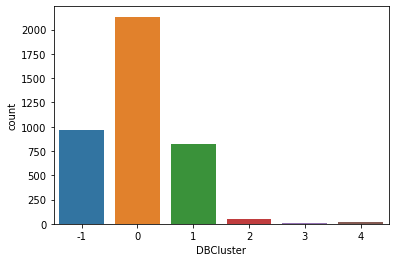

In [189]:
sns.countplot(y9['DBCluster'])

In [190]:
y9.iloc[:,1:12].groupby(y9.DBCluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
DBCluster,,,,,,,,,,,
-1,153643.480331,592.975155,2.685300,1.060041,1.050725,34663.012422,19.590062,1587.557971,4.595238,4655.547619,0.628364
0,46273.354430,0.703235,1.556493,1.000000,1.000000,7397.959212,7.789498,80.463197,0.279419,3753.015940,0.000000
1,47313.197320,2.436054,2.347138,1.000000,1.000000,17414.952497,11.605359,157.247259,0.532278,4338.215591,1.000000
2,88517.735849,0.000000,5.000000,1.000000,1.000000,64327.037736,17.735849,80.301887,0.339623,5806.056604,1.000000
3,143829.166667,0.000000,5.000000,1.000000,1.000000,62086.083333,16.083333,58.166667,0.166667,5285.250000,0.000000
4,139251.214286,0.000000,5.000000,1.000000,1.000000,60420.071429,14.000000,35.714286,0.071429,2489.857143,0.000000
